# Лабораторная работа 1
Делали алмазы и академики 4 группы: Денчик, Андрюха, Саня

In [ ]:
# Meta

import numpy as np
import matplotlib.pyplot as plt

# Возвращает точки для инетрвала
def points(a: float, b: float, n: int):
    h = (b-a)/n
    return [a+h*i for i in range(n+1)]

# Возвращает интервалы: [(начало, конец)]
def intervals(a: float, b: float, n: int):
    h = (b-a)/n
    return [(a+h*i, a+h*(i+1)) for i in range(n)]

# Производные
* Левая разностная
* Правая разностная
* Центральная разностная

In [ ]:
# Реализация методов
# Возвращают массив производных в точках на отрезке [a,b] с шагом n

# Левая разностная производная
def drv_lsub(f, a: float, b: float, n: int):
    h = (b-a)/n
    return [
        (f(p)-f(p-h))/h
        for p in points(a,b,n)]

# Правая разностная производная
def drv_rsub(f, a: float, b: float, n: int):
    h = (b-a)/n
    return [
        (f(p+h)-f(p))/h
        for p in points(a,b,n)]

# Центральная разностная (TODO)
def drv_csub(f, a: float, b: float, n: int):
    h = (b-a)/n
    return [
        (f(p+h)-f(p-h))/(2*h)
        for p in points(a,b,n)]

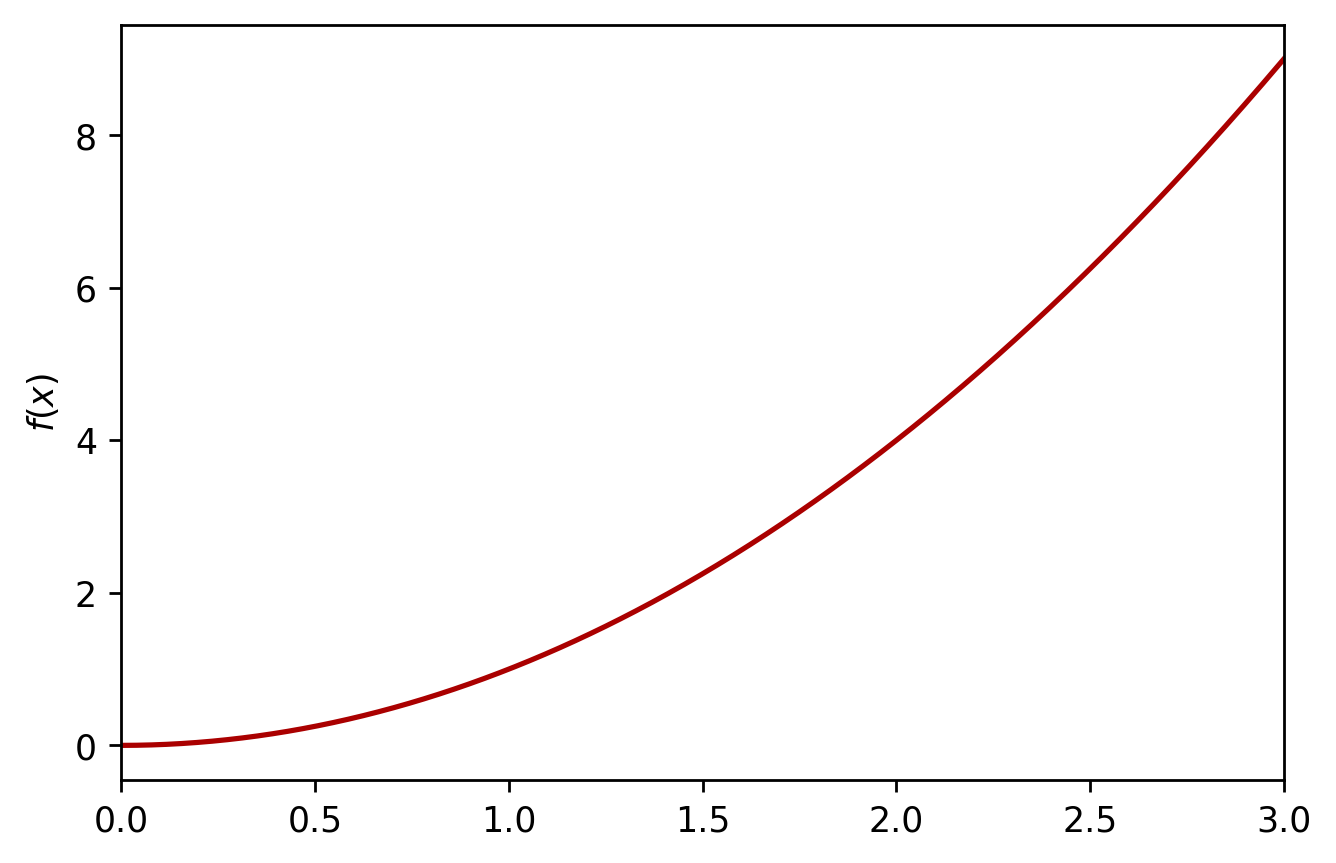

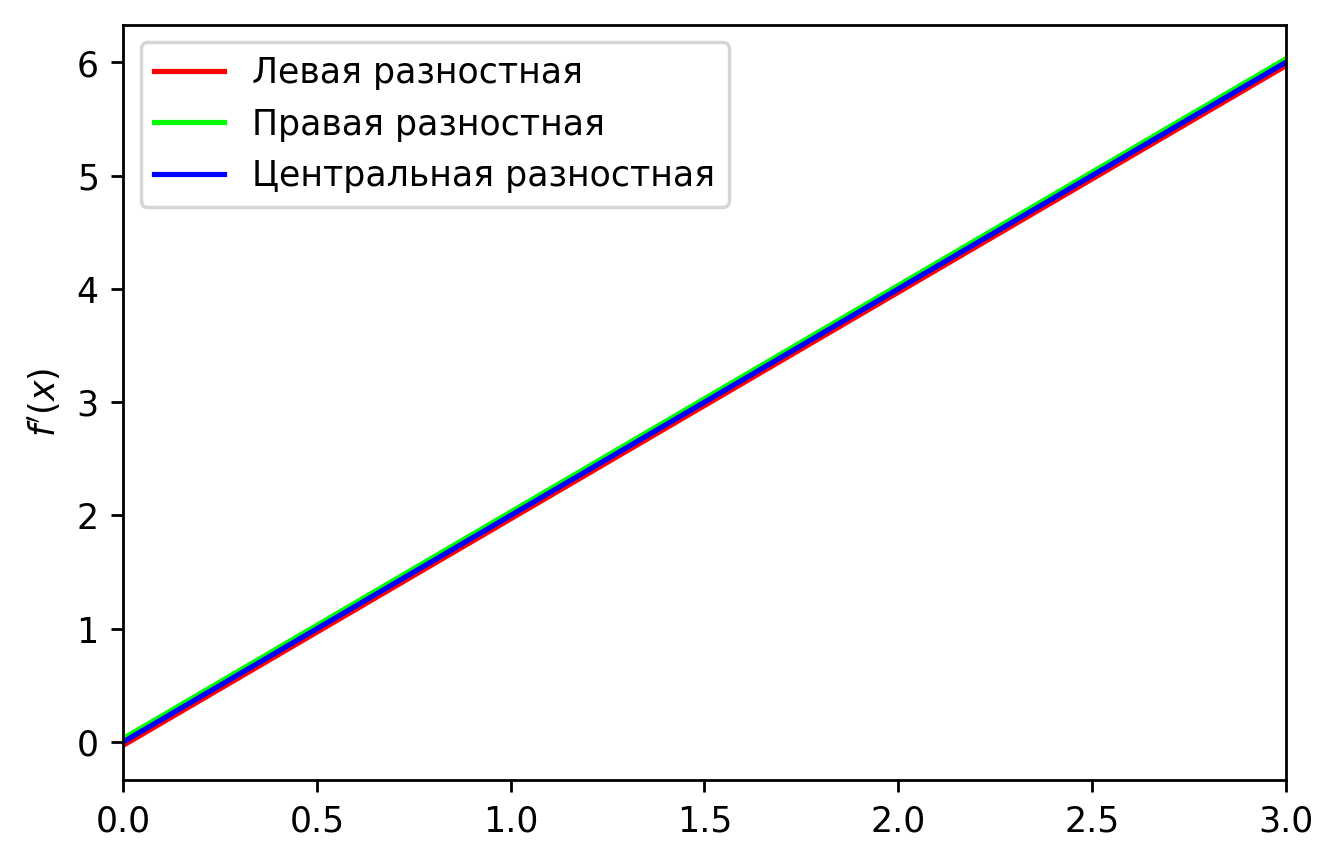

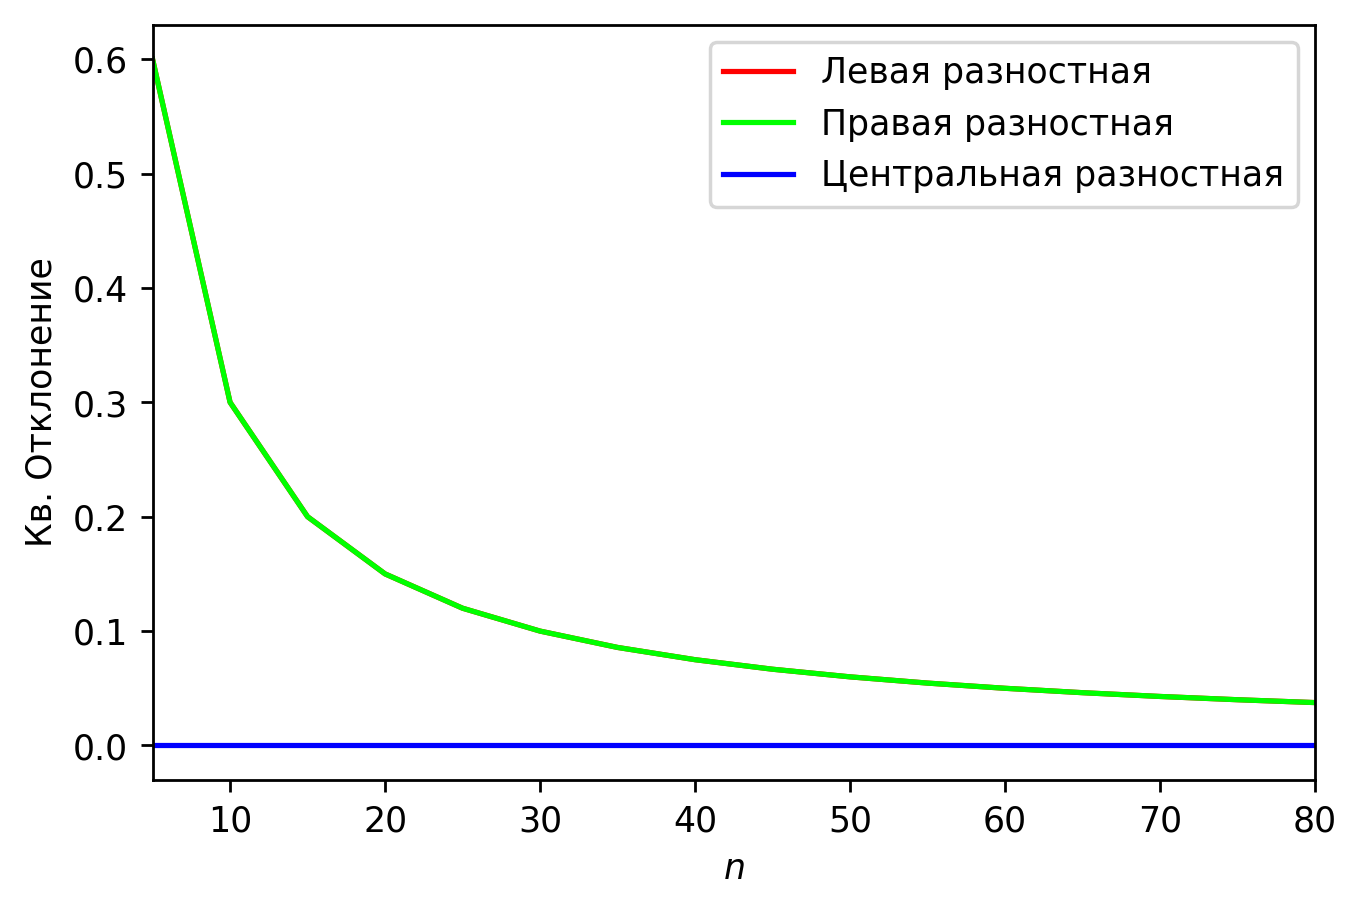

In [ ]:
# Графики

# Взятая функция
def f(x):
    return x**2

# Вычисленная вручную формула производной
def f_true(x):
    return 2*x

a = 0
b = 3
# n для среднеквадраточеского отклонения
ns = [5*i for i in range(1,17)]

# n для графика производных
gn = 100

####################################################
#################### ДАЛЬШЕ КОД ####################
####################################################

# Среднеквадратичное отклонение от истинного
def quad_dev(p1s, p2s) -> float:
    return np.sqrt(sum([
        (p1 - p2)**2 for (p1,p2) in zip(p1s,p2s)
    ]) / len(p1s))

def drv_true(n: int):
    global a, b, f_true
    return [f_true(p) for p in points(a,b,n)]

# Делает массив для визуализации
def f_arr(drv_f):
    global a, b, ns, f_true, drv_true
    return [quad_dev(
        drv_true(n),
        drv_f(f,a,b,n)
        ) for n in ns]

# График функции
plt.figure(dpi=250)

x=np.linspace(a,b,1000)
y=[f(xi) for xi in x]

plt.plot(x, y, color="#AA0000")

plt.xlim(a,b)
plt.ylabel("$f(x)$")
plt.show()

# График производных
plt.figure(dpi=250)

x = np.linspace(a,b,gn+1)
lsub = drv_lsub(f, a, b, gn)
rsub = drv_rsub(f, a, b, gn)
csub = drv_csub(f, a, b, gn)

alpha = 1
plt.plot(x, lsub, alpha=alpha, color="#ff0000", label="Левая разностная")
plt.plot(x, rsub, alpha=alpha, color="#00ff00", label="Правая разностная")
plt.plot(x, csub, alpha=alpha, color="#0000ff", label="Центральная разностная")

plt.xlim(a,b)
plt.ylabel("$f'(x)$")
plt.legend(loc="upper left")
plt.show()


# График отклонения
plt.figure(dpi=250)

lsub = f_arr(drv_lsub)
rsub = f_arr(drv_rsub)
csub = f_arr(drv_csub)

alpha = 1
plt.plot(ns, lsub, alpha=alpha, color="#ff0000", label="Левая разностная")
plt.plot(ns, rsub, alpha=alpha, color="#00ff00", label="Правая разностная")
plt.plot(ns, csub, alpha=alpha, color="#0000ff", label="Центральная разностная")

plt.xlim(ns[0], ns[-1])
plt.xlabel("$n$")
plt.ylabel("Кв. Отклонение")
plt.legend(loc="upper right")

plt.show()

# Интегрирование
* Левые прямоугольники
* Средние прямоугольники
* Правые прямоугольники
* Трапеции
* Симпсон

In [ ]:
# Реализация методов интегрирования
# Возвращают значение интеграла по [a,b] с заданным n

# Метод левых прямоугольников
def int_lrect(f, a: float, b: float, n: int) -> float:
    h = (b-a)/n
    return h * sum([
        f(t[0])
        for t in intervals(a,b,n)])

# Метод правых прямоугольников
def int_rrect(f, a: float, b: float, n: int) -> float:
    h = (b-a)/n
    return h * sum([
        f(t[1])
        for t in intervals(a,b,n)])

# Метод средних прямоугольников
def int_mrect(f, a: float, b: float, n: int) -> float:
    h = (b-a)/n
    return h * sum([
        f((t[0]+t[1])/2)
        for t in intervals(a,b,n)])

# Метод трапеций
def int_trapezoid(f, a: float, b: float, n: int) -> float:
    h = (b-a)/n
    return h * sum([
        (f(t[0])+f(t[1]))/2
        for t in intervals(a,b,n)])

# Симпсон
def int_simpson(f, a: float, b: float, n: int) -> float:
    h = (b-a)/n
    return h/6 * sum([
        (f(t[0]) + 4*f((t[0]+t[1])/2) + f(t[1]))
        for t in intervals(a,b,n)
    ])

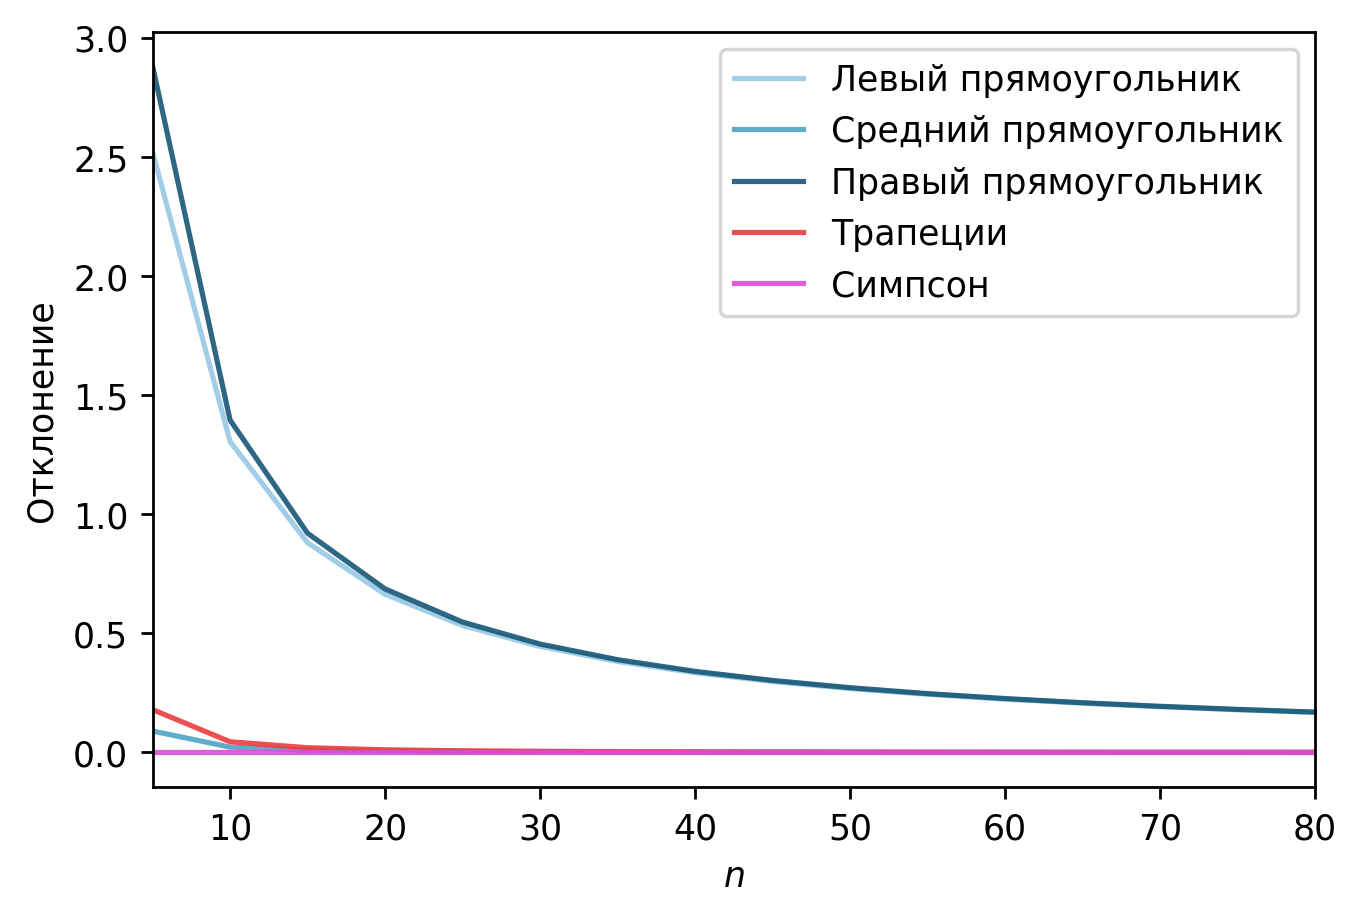

In [ ]:
# График отклонения

# Функция, которую будем интегрировать
def f(x: float) -> float:
    return x**2

# Результат ручного интегрирования
f_true = 9

a = 0.0
b = 3

####################################################
#################### ДАЛЬШЕ КОД ####################
####################################################

ns = [5*i for i in range(1,17)]

# Делает массив n для последующей визуализации
# int_f - Метод интегрирования (f,a,b,n)
# f - Интегрируемая функция
def f_arr(int_f):
    global a, b, ns, f_true, f
    return [abs(f_true - int_f(f,a,b,n)) for n in ns]

plt.figure(dpi=250)

lrect = f_arr(int_lrect)
mrect = f_arr(int_mrect)
rrect = f_arr(int_rrect)
trapezoid = f_arr(int_trapezoid)
simpson   = f_arr(int_simpson)

alpha = 0.9

plt.plot(ns, lrect,     color="#97C9E4", alpha=alpha, label="Левый прямоугольник")
plt.plot(ns, mrect,     color="#4BA3C3", alpha=alpha, label="Средний прямоугольник")
plt.plot(ns, rrect,     color="#175676", alpha=alpha, label="Правый прямоугольник")
plt.plot(ns, trapezoid, color="#E93C3C", alpha=alpha, label="Трапеции")
plt.plot(ns, simpson,   color="#D84DD8", alpha=alpha, label="Симпсон")

plt.xlim(ns[0], ns[-1])
plt.xlabel("$n$")
plt.ylabel("Отклонение")
plt.legend(loc="upper right")

plt.show()